<a href="https://colab.research.google.com/github/Abdelrahman-Kanakri/Data-Science-and-AI/blob/Machine-Learning/Music_EDA_MODEL_LAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading required Modules

## The data set cotains the following features:
1. artist: Name of the Artist.
2. song: Name of the Track.
3. popularity: The higher the value the more popular the song is.
4. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm
5. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

6. key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

7. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

8. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

9. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

10. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

11. instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

12. liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

13. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

14. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

15. duration in milliseconds :Time of the song

16. time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

17. Class: Genre of the track.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AnancondaPY/ML&DL&EDA/_Classification/Music Genre Classification/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AnancondaPY/ML&DL&EDA/_Classification/Music Genre Classification/test.csv")

# EDA

## EDA: Training Data

In [ ]:
train_df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [ ]:
train_df.drop(columns = ["Id"], inplace=True)
test_df.drop(columns = ["Id"], inplace=True)

In [ ]:
train_df.shape

(14396, 17)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14063 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12787 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10855 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [ ]:
train_df.isnull().sum()

,0
Artist Name,0
Track Name,0
Popularity,333
danceability,0
energy,0
key,1609
loudness,0
mode,0
speechiness,0
acousticness,0


In [ ]:
train_df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
train_df.duplicated().sum()

0

In [ ]:
corr_train = train_df.select_dtypes(include=np.number).corr()["Class"]*100
corr_train

,Class
Popularity,15.948422
danceability,-10.115231
energy,21.561081
key,-0.417451
loudness,17.411115
mode,-4.009232
speechiness,-6.278379
acousticness,-24.060886
instrumentalness,-2.863123
liveness,4.010052


<code> Summary </code>

**Missing values:**
                               
The data has some **NULL** values in the following variables which we will be handling in subsequent steps:
<ol>

    1- Popularity(numerical): 333
    2- key(categorical): 1609
    3- instrumentalness(numerical): 3541
</ol>

**Naming:** Variable names will be edit for good naming consistency.

**Correlation:** we will give more focus on correlation in further steps.

**Dublicates**: there is almost 0 dublicates in the data which is good

### Visualization

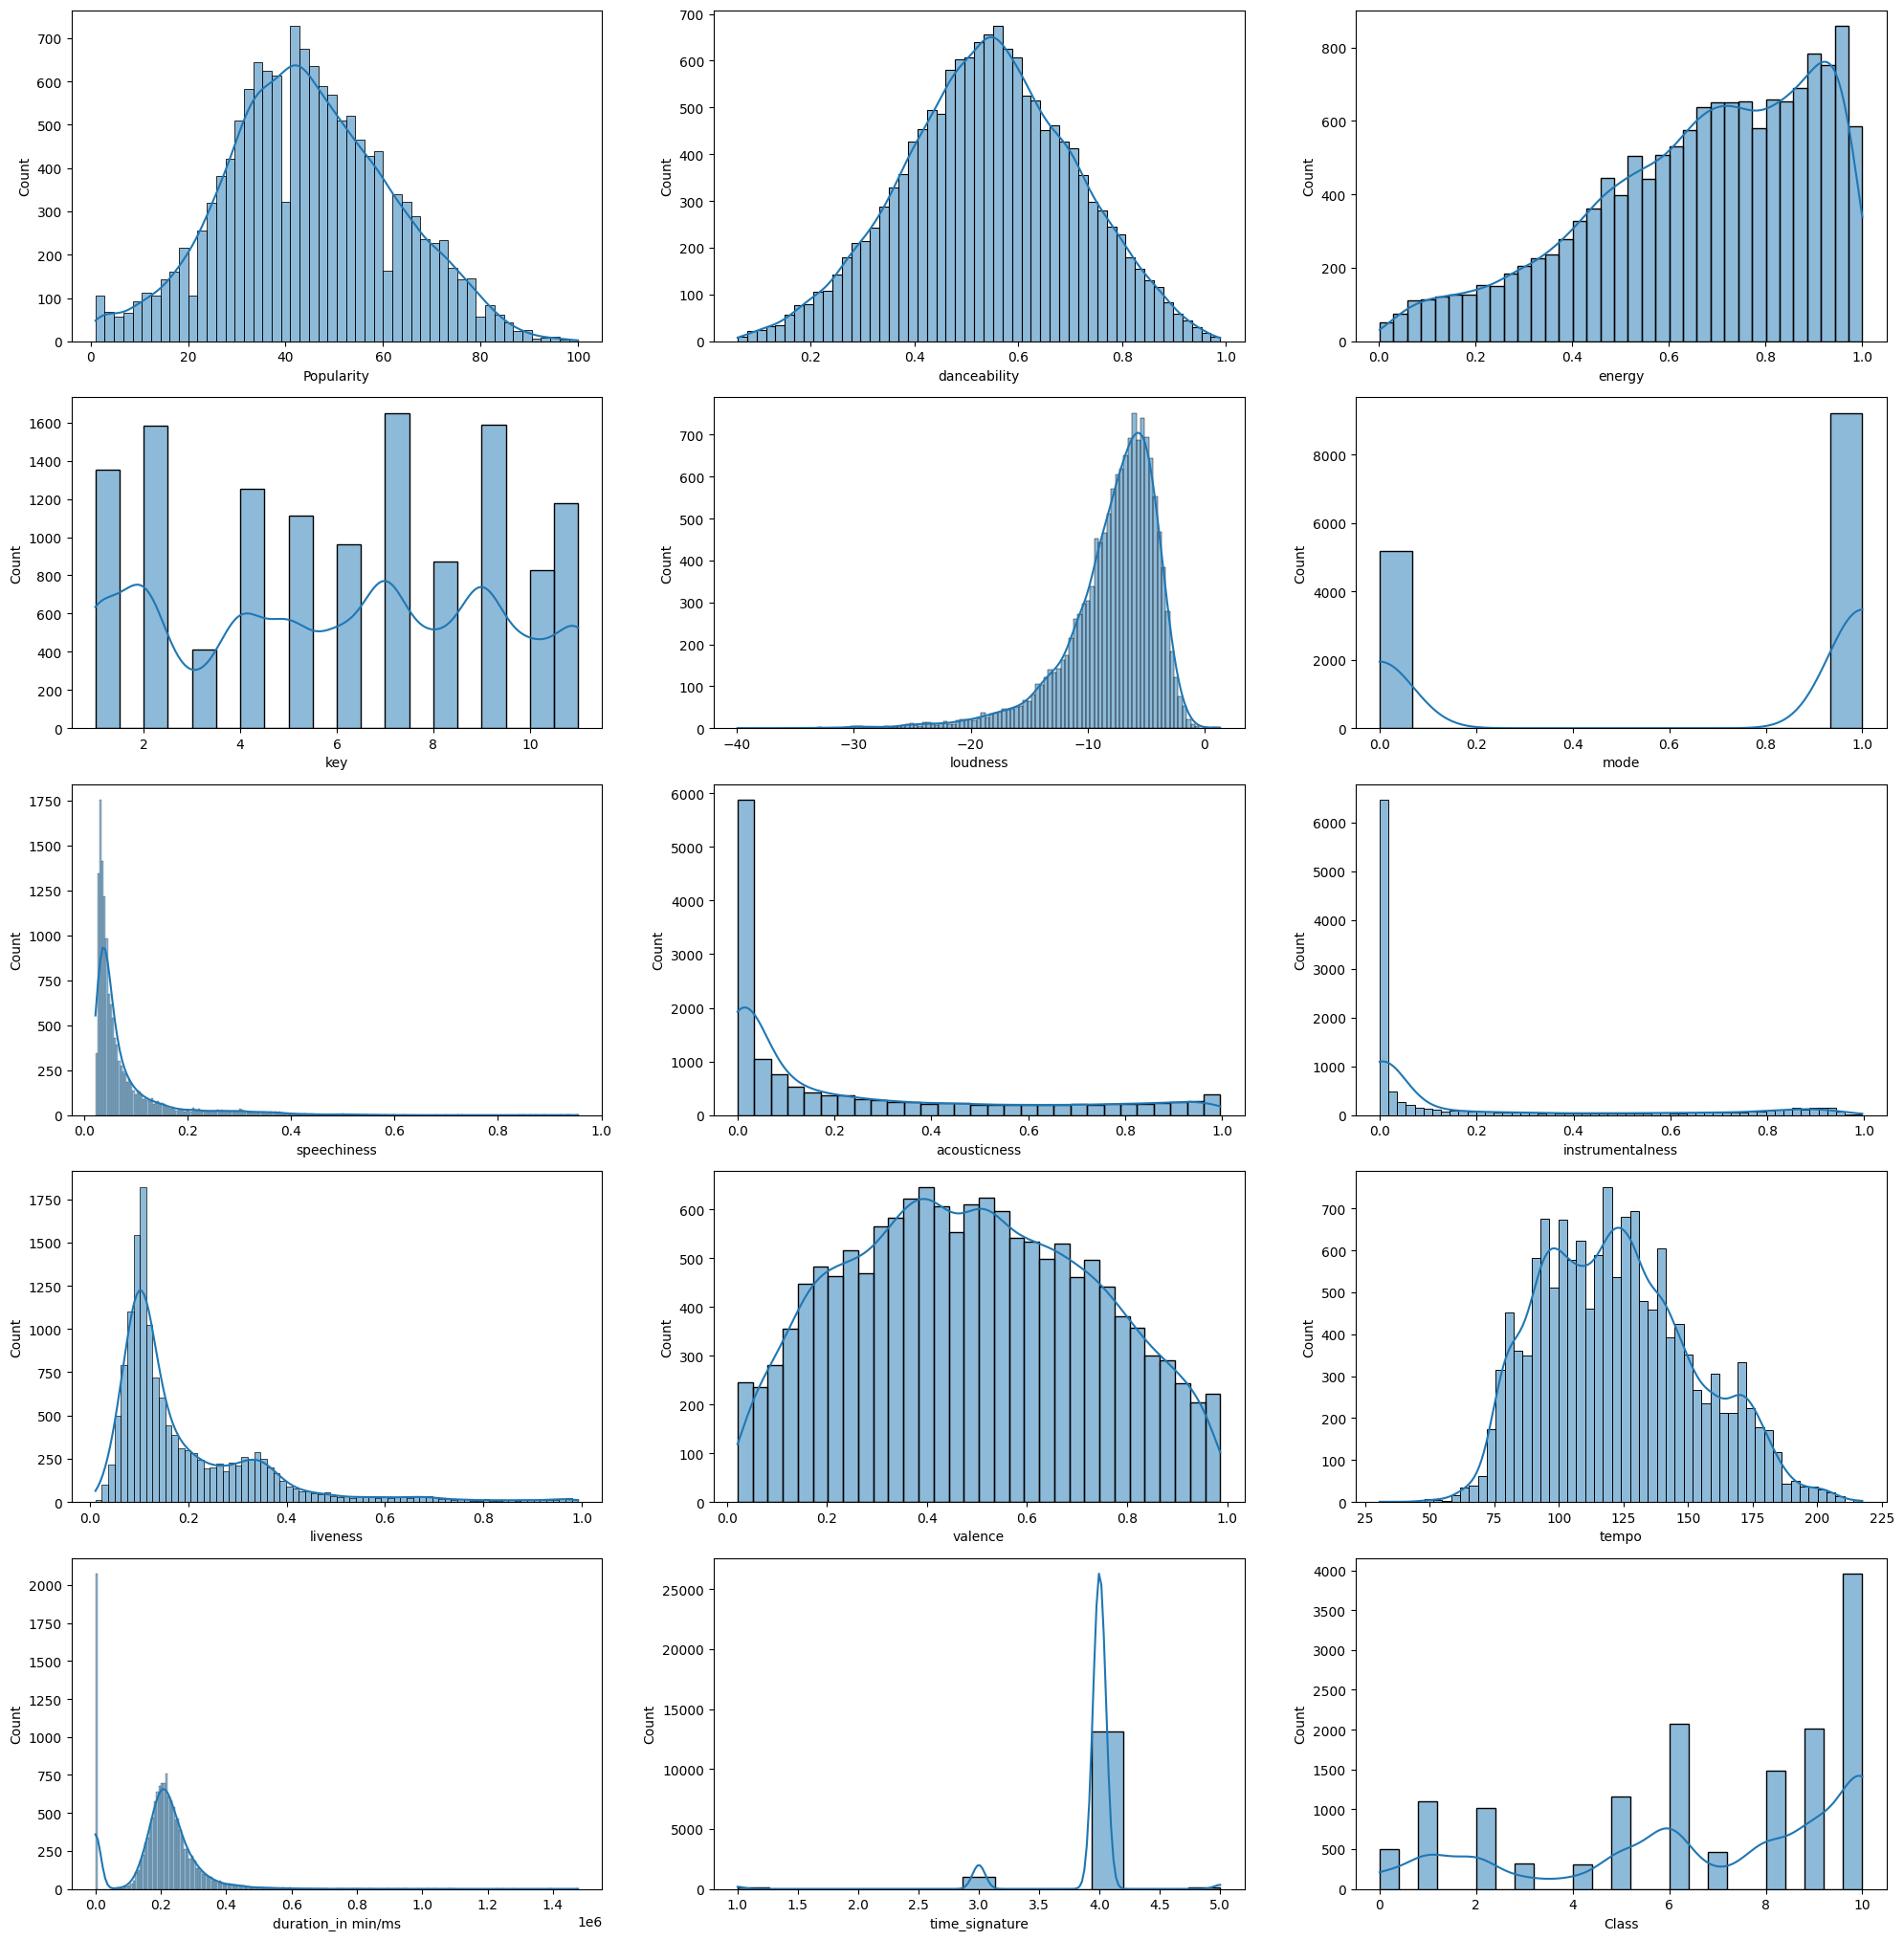

In [ ]:
fig = plt.figure(figsize=(20, 24))
train_col = train_df.select_dtypes(np.number).columns
sns.set_style()
for i, columns in enumerate(train_col):

    ax = plt.subplot(6, 3, i+1)
    sns.histplot(x = train_df[columns], kde=True)
    ax.set_xlabel(columns)
    plt.tight_layout(w_pad=3)
plt.show()

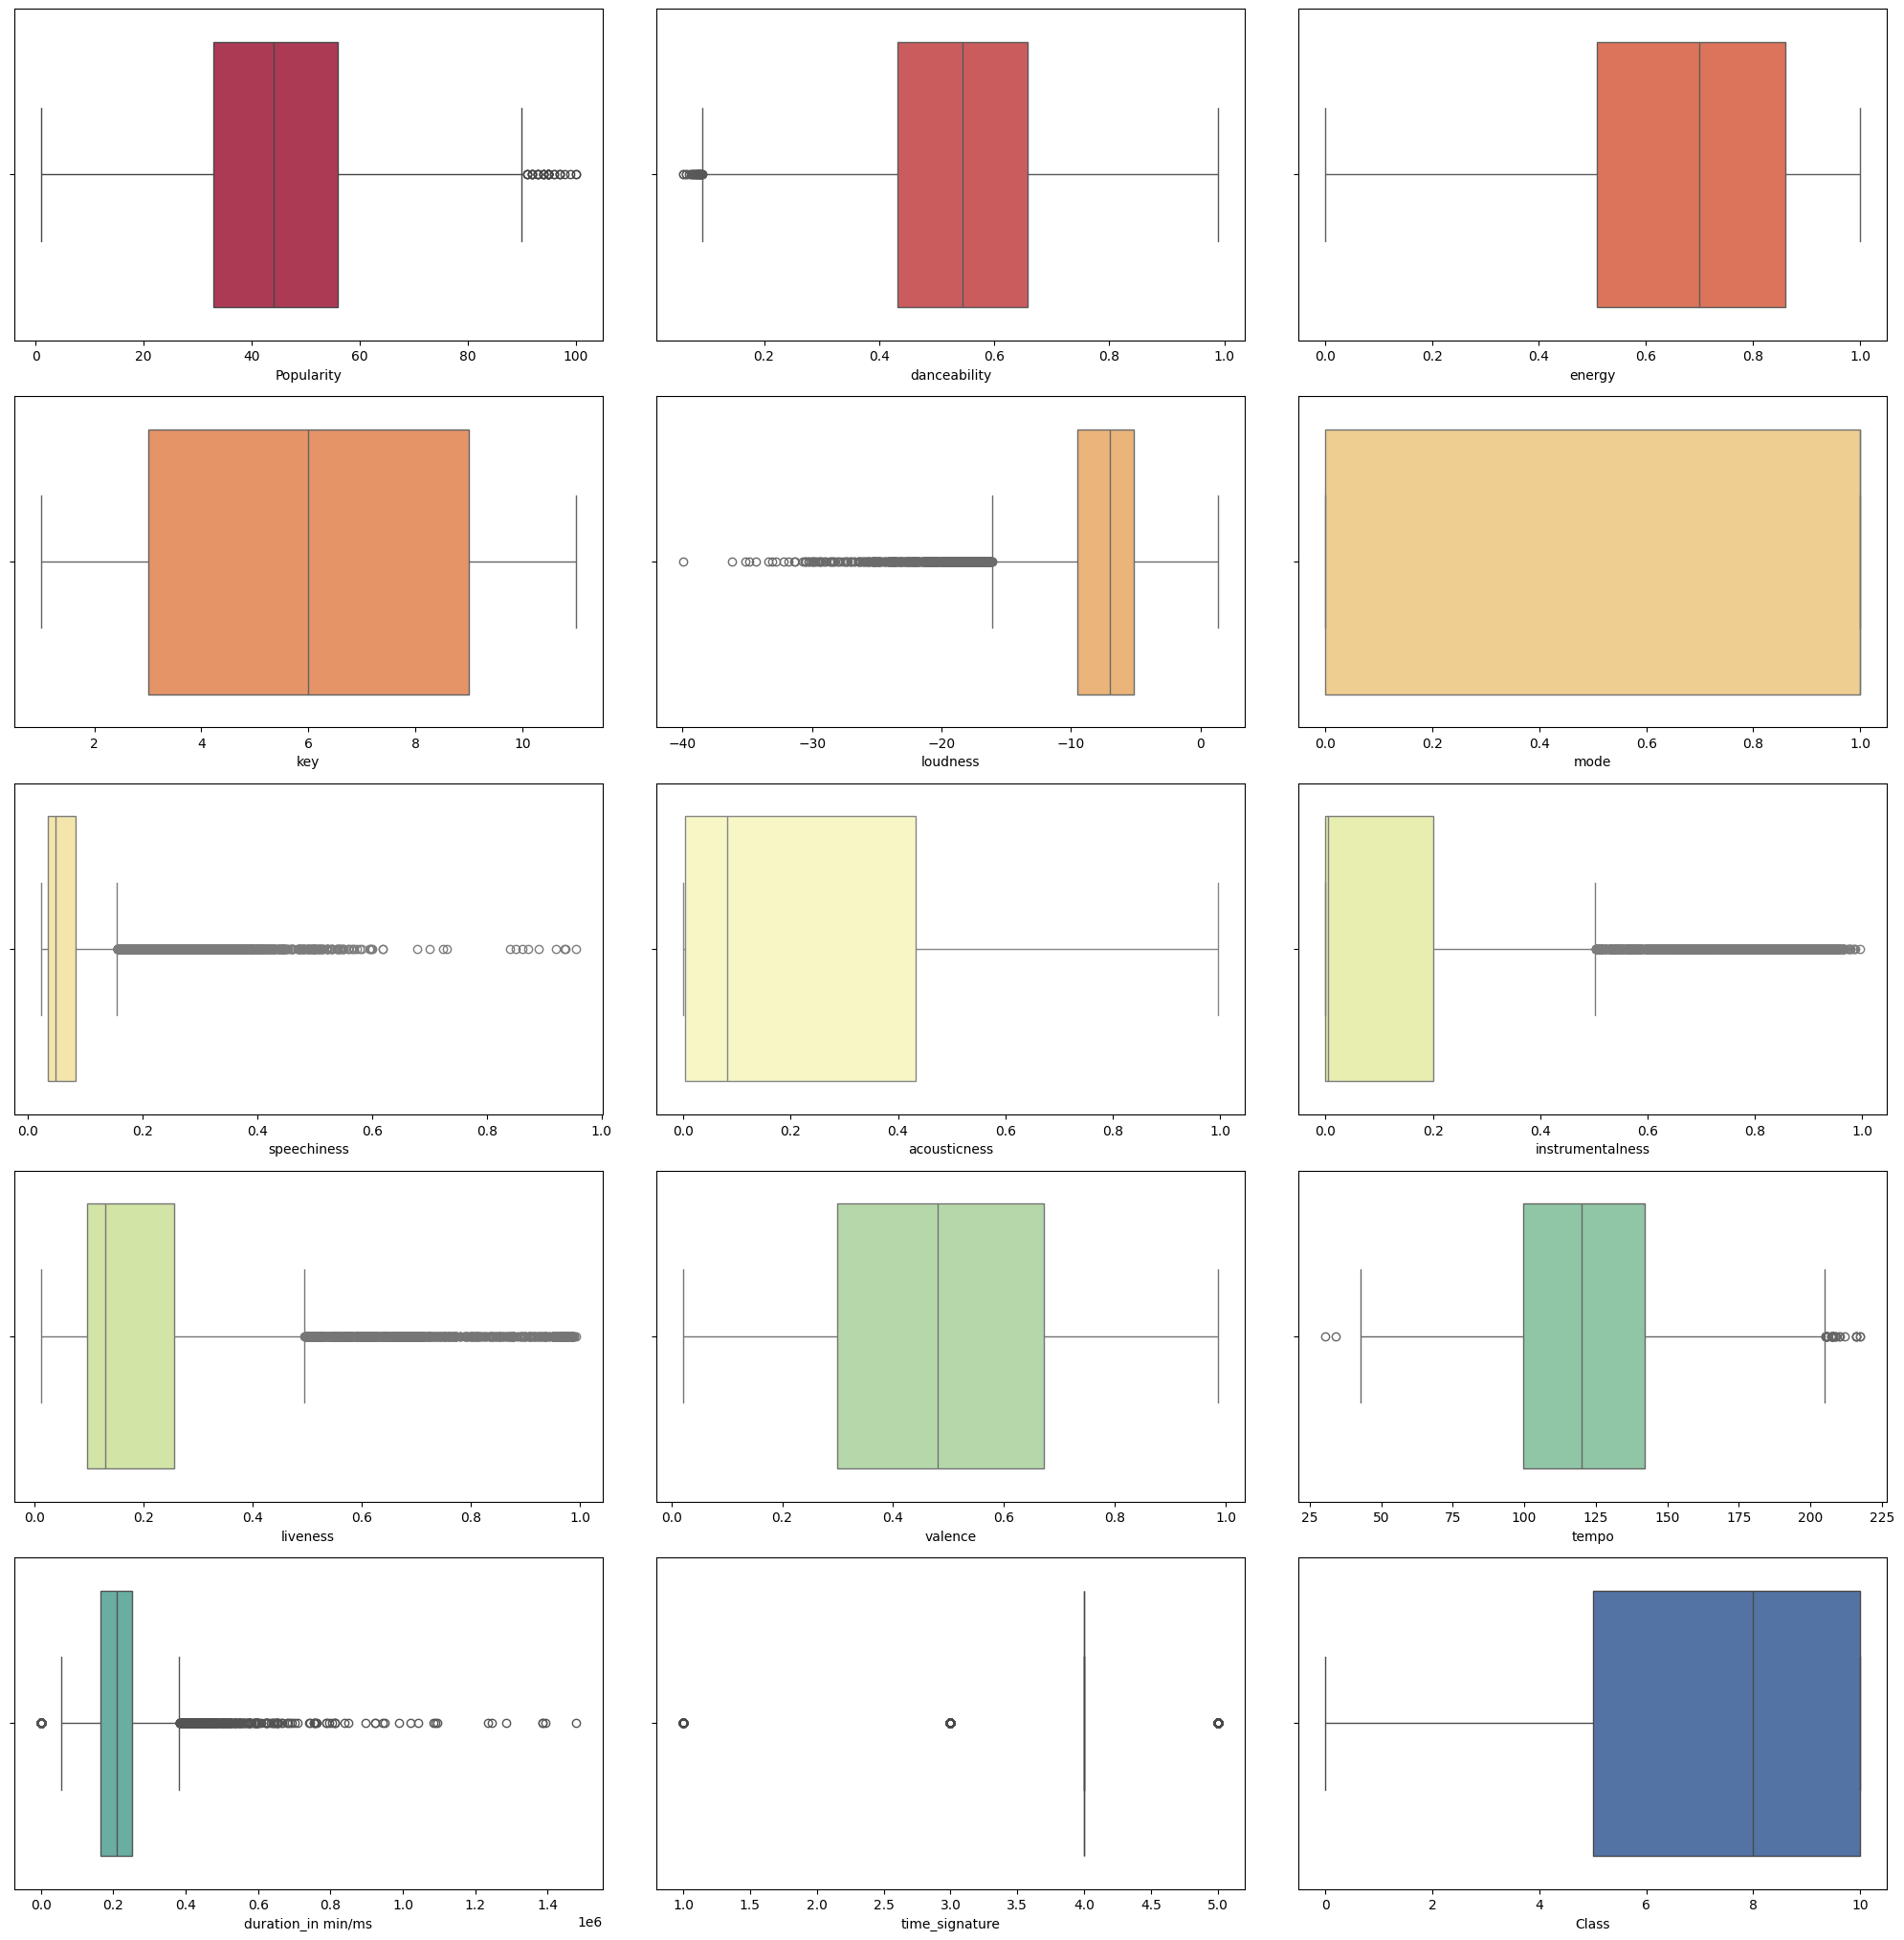

In [ ]:
colors = sns.color_palette("Spectral", len(train_col))

fig = plt.figure(figsize=(20, 24))
for i, column in enumerate(train_col):
    plt.subplot(6, 3, i+1)
    sns.boxplot(x = train_df[column], color=colors[i])  # Use the i-th color
    ax = plt.gca()
    ax.set_xlabel(column)
    plt.tight_layout(w_pad=3)

plt.show()


<Axes: >

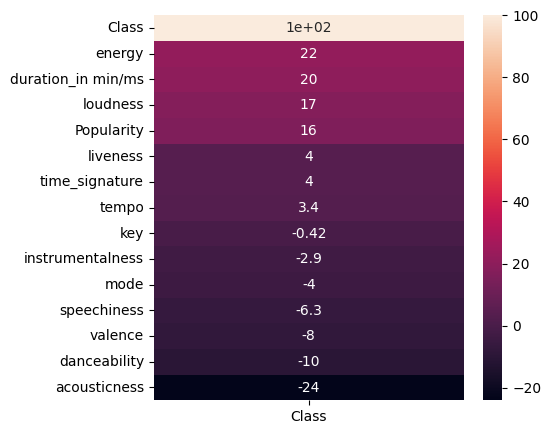

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_train.sort_values(ascending=False).to_frame(), annot=True)

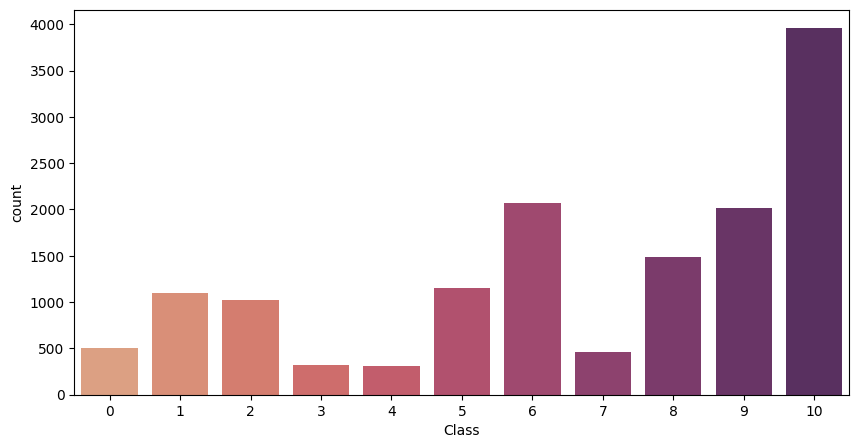

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = train_df, x = "Class", palette="flare")
plt.show()

## EDA: Testing Data

In [ ]:
test_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


In [ ]:
test_df.shape

(3600, 16)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         3600 non-null   object 
 1   Track Name          3600 non-null   object 
 2   Popularity          3505 non-null   float64
 3   danceability        3600 non-null   float64
 4   energy              3600 non-null   float64
 5   key                 3195 non-null   float64
 6   loudness            3600 non-null   float64
 7   mode                3600 non-null   int64  
 8   speechiness         3600 non-null   float64
 9   acousticness        3600 non-null   float64
 10  instrumentalness    2764 non-null   float64
 11  liveness            3600 non-null   float64
 12  valence             3600 non-null   float64
 13  tempo               3600 non-null   float64
 14  duration_in min/ms  3600 non-null   float64
 15  time_signature      3600 non-null   int64  
dtypes: flo

In [ ]:
test_df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,3505.000000,3600.000000,3600.000000,3195.000000,3600.000000,3600.000000,3600.000000,3600.000000,2764.000000,3600.000000,3600.000000,3600.000000,3.600000e+03,3600.000000
mean,44.459629,0.544744,0.664197,5.947105,-7.949879,0.622778,0.077813,0.248425,0.175336,0.197720,0.485527,122.335063,2.033447e+05,3.922778
std,17.461328,0.169257,0.233010,3.184676,4.016468,0.484759,0.076914,0.309510,0.303238,0.159040,0.243082,29.705640,1.131593e+05,0.369936
min,1.000000,0.064600,0.000020,1.000000,-34.797000,0.000000,0.022700,0.000001,0.000001,0.014400,0.018300,48.718000,9.871167e-01,1.000000
25%,33.000000,0.430000,0.512000,3.000000,-9.532500,0.000000,0.034800,0.004488,0.000093,0.098575,0.291000,98.515750,1.688360e+05,4.000000
50%,44.000000,0.549000,0.703000,6.000000,-7.043500,1.000000,0.048750,0.080850,0.003755,0.131000,0.481000,120.091000,2.103355e+05,4.000000
75%,56.000000,0.664000,0.859000,9.000000,-5.282250,1.000000,0.082800,0.441250,0.197250,0.265250,0.674000,141.846750,2.533958e+05,4.000000
max,97.000000,0.970000,0.999000,11.000000,1.355000,1.000000,0.886000,0.996000,0.973000,1.000000,0.984000,214.396000,1.412451e+06,5.000000


In [ ]:
test_df.isnull().sum()

,0
Artist Name,0
Track Name,0
Popularity,95
danceability,0
energy,0
key,405
loudness,0
mode,0
speechiness,0
acousticness,0


In [ ]:
test_df.duplicated().sum()

71

<code> Summary </code>

**Missing values:**
                               
The data has some **NULL** values in the following variables which we will be handling in subsequent steps:
<ol>

    1- Popularity(numerical):  95
    2- key(categorical):  405
    3- instrumentalness(numerical): 836
</ol>

**Naming:** Variable names will be edit for good naming consistency.

**Correlation:** we will give more focus on correlation in further steps.

**Dublicates**: there is almost 71 dublicates in the data

### Visualization

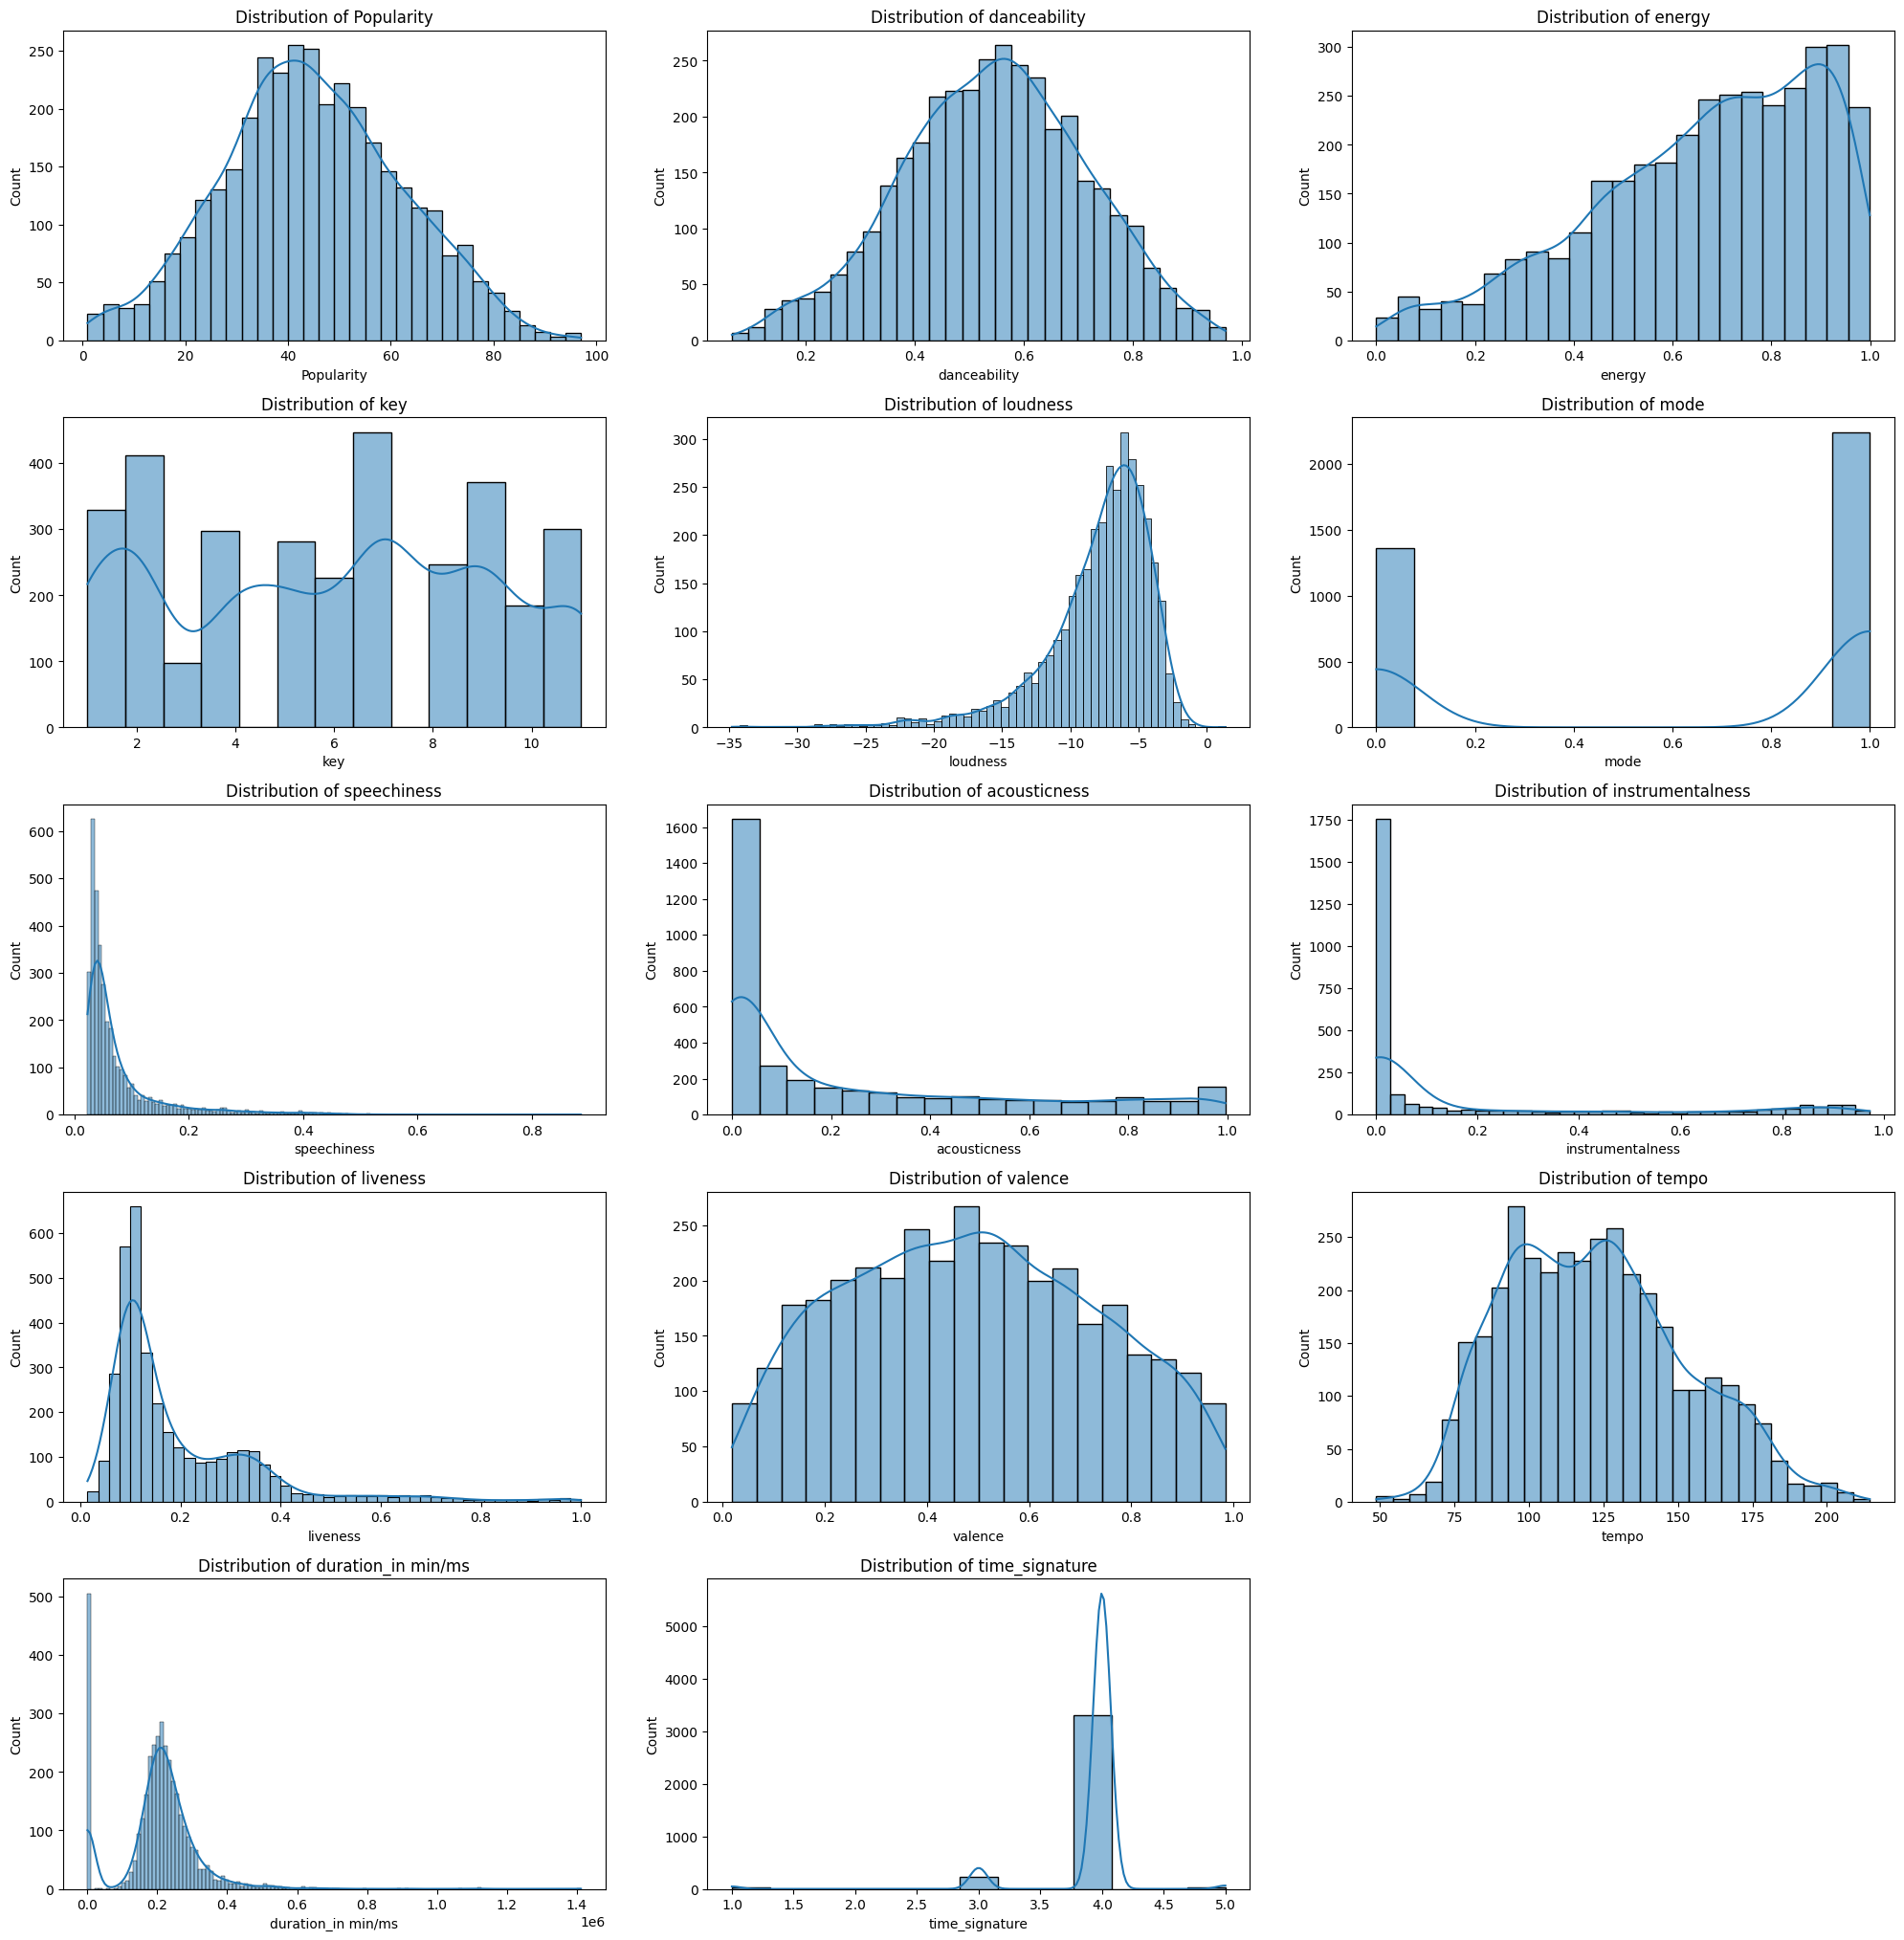

In [ ]:
fig = plt.figure(figsize=(20, 24))
test_col = test_df.select_dtypes(np.number).columns
sns.set_style()
for i, columns in enumerate(test_col):

    ax = plt.subplot(6, 3, i+1)
    sns.histplot(x = test_df[columns], kde=True)
    ax.set_xlabel(columns)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)
plt.show()

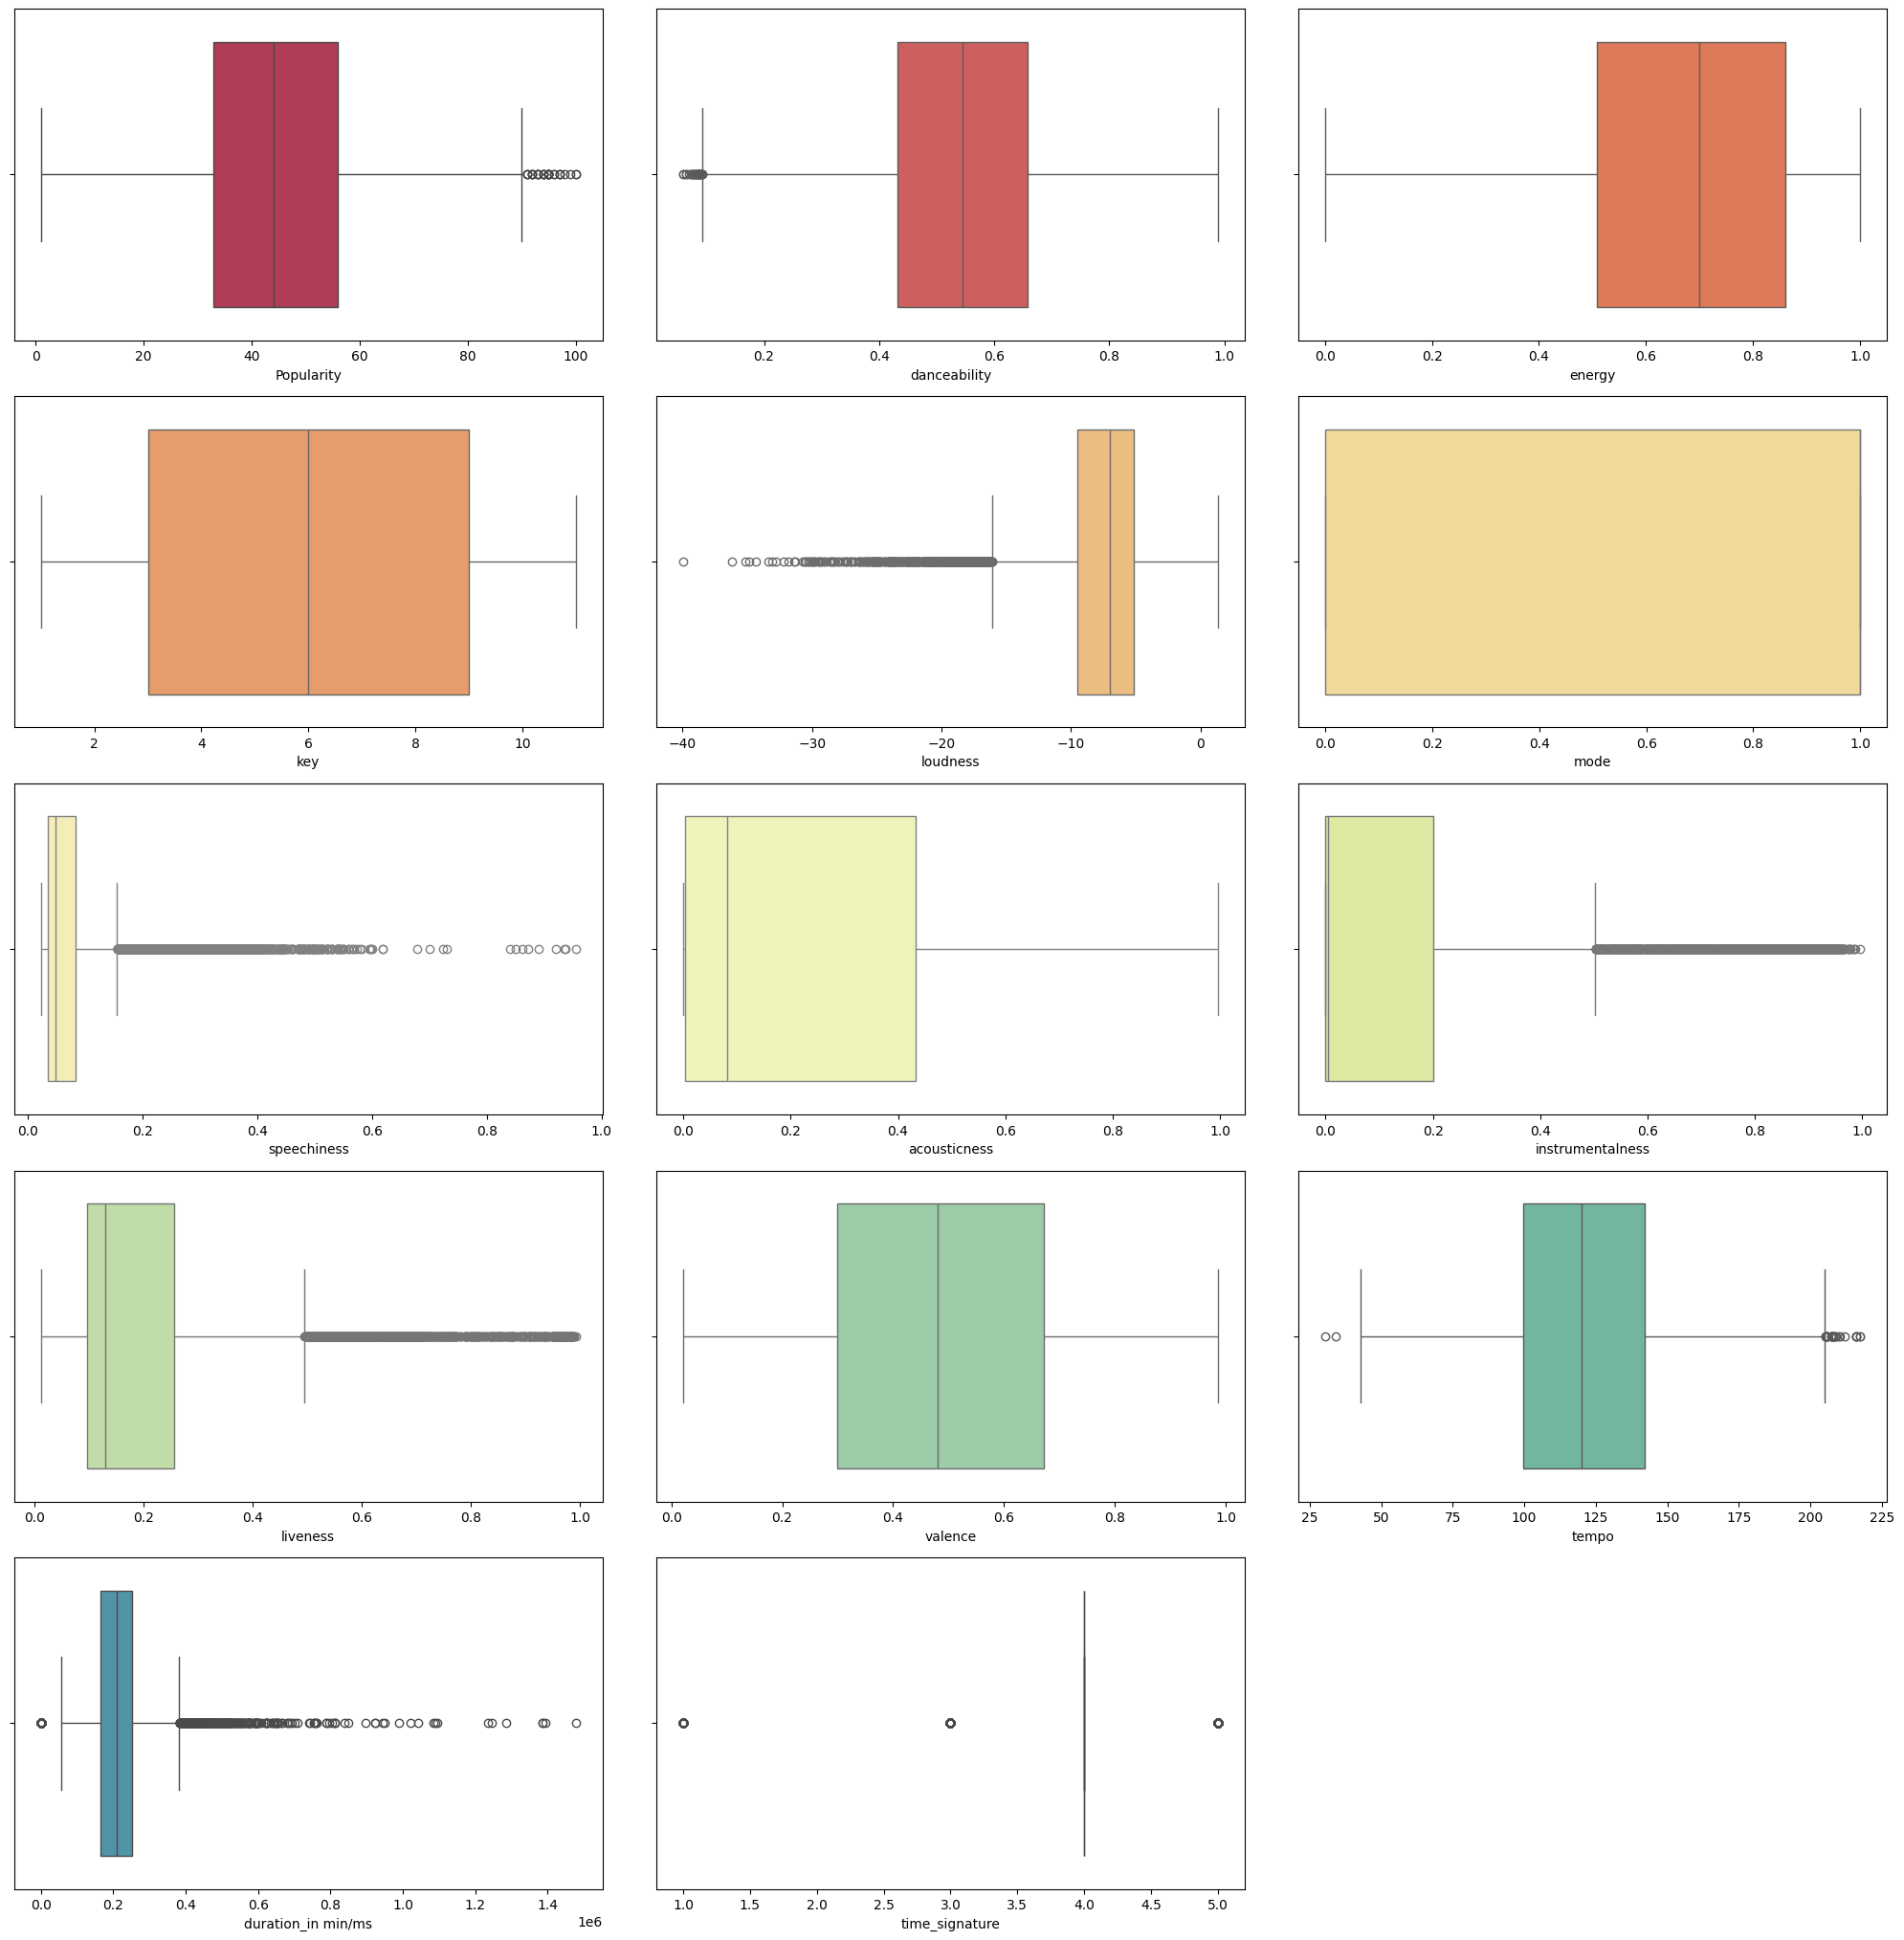

In [ ]:
colors = sns.color_palette("Spectral", len(test_col))

fig = plt.figure(figsize=(20, 24))
for i, column in enumerate(test_col):
    plt.subplot(6, 3, i+1)
    sns.boxplot(x = train_df[column], color=colors[i])
    ax = plt.gca()
    ax.set_xlabel(column)
    plt.tight_layout(w_pad=3)

plt.show()

# Data Preprocessing

## Proper naming

In [ ]:
def column_changer(df):
    list = []
    for name in df.columns.values:
        list.append(name.lower())
    df.columns = list
    return df.columns

train_df1 = train_df.copy()
test_df1 = test_df.copy()

print("The train set new columns:" , column_changer(train_df1))
print("The test set new columns:" ,column_changer(test_df1))

The train set new columns: Index(['artist name', 'track name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'class'],
      dtype='object')
The test set new columns: Index(['artist name', 'track name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature'],
      dtype='object')


In [ ]:
# we dropped the below columns since its has no meaning in our analysis
train_df1.drop(columns=['artist name', 'track name'], inplace = True)
test_df1.drop(columns=['artist name', 'track name'], inplace = True)
train_df_named = train_df1.copy()
test_df_named = test_df1.copy()

## Missing values handling

were going to handle the basics, then we will analyze the data deeply

### Training handle

In [ ]:
train_df_named.isnull().sum()

,0
popularity,333
danceability,0
energy,0
key,1609
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,3541
liveness,0


**The technique we will use is:**
<ol>

    1- filling with MEAN if the columns is normally distributed.
    2- filling with MEDIAN if the columns is skewed no matter the direction.
    3- filling with MODE if the columns is categorical
</ol>

In [ ]:
print("Train[\"popularity\"] mean: " ,train_df_named["popularity"].mean())
print("Train[\"key\"] mode: " , train_df_named["key"].mode())
print("Train[\"instrumentalness\"] median: " ,train_df_named["instrumentalness"].mean())

Train["popularity"] mean:  44.525207992604706
Train["key"] mode:  0    7.0
Name: key, dtype: float64
Train["instrumentalness"] median:  0.17812871735974206


In [ ]:
train_df_named["popularity"] = train_df_named["popularity"].fillna(train_df_named["popularity"].mean())

train_df_named["key"] = train_df_named["key"].fillna(train_df_named["key"].mode()[0])

train_df_named["instrumentalness"] = train_df_named["instrumentalness"].fillna(train_df_named["instrumentalness"].median())

In [ ]:
train_df_named[["popularity", "key", "instrumentalness"]].isnull().sum()

,0
popularity,0
key,0
instrumentalness,0


### Testing handle

In [ ]:
test_df_named.isnull().sum()

,0
popularity,95
danceability,0
energy,0
key,405
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,836
liveness,0


**We will use the same tech's as the training handle**

In [ ]:
print("Test[\"popularity\"] mean: " ,test_df_named["popularity"].mean())
print("Test[\"key\"] mode: " , test_df_named["key"].mode())
print("Test[\"instrumentalness\"] median: " ,test_df_named["instrumentalness"].mean())

Test["popularity"] mean:  44.45962910128388
Test["key"] mode:  0    7.0
Name: key, dtype: float64
Test["instrumentalness"] median:  0.1753359748986975


In [ ]:
test_df_named["popularity"] = test_df_named["popularity"].fillna(test_df_named["popularity"].mean())

test_df_named["key"] = test_df_named["key"].fillna(test_df_named["key"].mode()[0])

test_df_named["instrumentalness"] = test_df_named["instrumentalness"].fillna(test_df_named["instrumentalness"].median())

In [ ]:
test_df_named[["popularity", "key", "instrumentalness"]].isnull().sum()

,0
popularity,0
key,0
instrumentalness,0


## Dublicates (train/test)

In [ ]:
train_df_named.drop_duplicates(inplace=True)
test_df_named.drop_duplicates(inplace= True)

In [ ]:
print("Train duplicates?", train_df_named.duplicated().sum())
print("Test duplicates?", test_df_named.duplicated().sum())

Train duplicates? 0
Test duplicates? 0


## CheckPoint

In [ ]:
train_df_checkP = train_df_named.copy()
test_df_checkP = test_df_named.copy()

## Outlier detect

In [ ]:
def outlier_detect(df, features):
    fixed = []
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        fixed.append((lower_bound, upper_bound))

    for feature, (lower_bound, upper_bound) in zip(features, fixed):
        if feature in df.columns:
            df[feature] = np.where(df[feature] > upper_bound, upper_bound,
            np.where(df[feature] < lower_bound, lower_bound, df[feature]))
    return df

In [ ]:
features_ = train_df_checkP.drop(columns = ["time_signature", "class"]).columns.values
features_

array(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms'], dtype=object)

In [ ]:
train_df_checkP = outlier_detect(train_df_checkP, features_)

In [ ]:
test_df_checkP = outlier_detect(test_df_checkP, features_)

In [ ]:
train_df_checkP.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
count,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000
mean,44.493035,0.543136,0.662486,6.071041,-7.710778,0.640134,0.065854,0.246681,0.037455,0.184897,0.486392,122.690581,201123.775240,3.924297,6.694336
std,17.184386,0.165457,0.235989,3.033601,3.440219,0.479978,0.042068,0.310920,0.057916,0.124305,0.239529,29.505301,88754.113551,0.359725,3.206117
min,1.000000,0.093000,0.001210,1.000000,-16.103875,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,36.522625,35143.125000,1.000000,0.000000
25%,33.000000,0.432000,0.508000,4.000000,-9.538000,0.000000,0.034800,0.004265,0.000294,0.097275,0.298750,99.802750,165377.250000,4.000000,5.000000
50%,44.000000,0.545000,0.699500,7.000000,-7.010000,1.000000,0.047100,0.081400,0.003920,0.129000,0.481000,120.060000,208906.500000,4.000000,8.000000
75%,56.000000,0.658000,0.861000,8.000000,-5.160750,1.000000,0.083100,0.432000,0.057700,0.256000,0.672000,141.989500,252200.000000,4.000000,10.000000
max,90.500000,0.989000,1.000000,11.000000,1.342000,1.000000,0.155550,0.996000,0.143809,0.494088,0.986000,205.269625,382434.125000,5.000000,10.000000


In [ ]:
test_df_checkP.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,44.368838,0.544918,0.662203,6.058740,-7.767397,0.622872,0.066148,0.251561,0.033506,0.187584,0.484609,122.251365,203804.803207,3.922815
std,17.225519,0.169351,0.233819,3.014152,3.375621,0.484736,0.041847,0.310671,0.051435,0.126298,0.242813,29.702246,88001.808919,0.369504
min,1.000000,0.081500,0.000020,1.000000,-15.953250,0.000000,0.022700,0.000001,0.000001,0.014400,0.018300,48.718000,40029.750000,1.000000
25%,33.000000,0.431000,0.509000,4.000000,-9.558000,0.000000,0.034800,0.004750,0.000291,0.098500,0.290000,98.303250,168000.000000,4.000000
50%,44.000000,0.549000,0.701000,7.000000,-7.056000,1.000000,0.048750,0.085350,0.003755,0.131000,0.480000,120.069000,210264.000000,4.000000
75%,56.000000,0.664000,0.857000,8.000000,-5.294500,1.000000,0.083100,0.446000,0.051000,0.265000,0.674000,141.321750,253313.500000,4.000000
max,90.500000,0.970000,0.999000,11.000000,1.100750,1.000000,0.155550,0.996000,0.127063,0.514750,0.984000,205.849500,381283.750000,5.000000


##  Deep analyze

In [ ]:
train_df_checkP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14372 entries, 0 to 14395
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   popularity          14372 non-null  float64
 1   danceability        14372 non-null  float64
 2   energy              14372 non-null  float64
 3   key                 14372 non-null  float64
 4   loudness            14372 non-null  float64
 5   mode                14372 non-null  float64
 6   speechiness         14372 non-null  float64
 7   acousticness        14372 non-null  float64
 8   instrumentalness    14372 non-null  float64
 9   liveness            14372 non-null  float64
 10  valence             14372 non-null  float64
 11  tempo               14372 non-null  float64
 12  duration_in min/ms  14372 non-null  float64
 13  time_signature      14372 non-null  int64  
 14  class               14372 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 1.8 MB


### popularity
popularity: The higher the value the more popular the song is.

<ol>
    
    1-20 (Low Popularity)
    21-40 (Moderate Popularity)
    41-60 (Average Popularity)
    61-80 (High Popularity)
    81-100 (Very High Popularity)
</ol>

In [ ]:
train_df_checkP["popularity"].unique()

array([37.        , 67.        , 44.52520799, 12.        , 48.        ,
       38.        , 11.        , 45.        , 58.        , 68.        ,
       51.        , 57.        , 19.        , 70.        , 47.        ,
       25.        , 61.        , 10.        ,  4.        , 50.        ,
       62.        , 28.        , 14.        , 21.        , 36.        ,
       34.        ,  1.        , 55.        , 31.        , 32.        ,
        3.        , 60.        , 39.        , 65.        , 44.        ,
       40.        , 71.        , 54.        , 46.        , 89.        ,
       63.        , 49.        , 90.5       , 26.        , 52.        ,
       16.        , 33.        , 41.        ,  9.        , 42.        ,
       23.        , 29.        , 77.        , 18.        , 73.        ,
       66.        , 69.        ,  8.        , 22.        , 30.        ,
       43.        , 27.        , 82.        , 64.        , 59.        ,
       56.        , 35.        , 24.        , 72.        , 80.  

In [ ]:
train_df_checkP["popularity"] = train_df_checkP["popularity"].astype(np.int32)
train_df_checkP["popularity"]

,popularity
0,37
1,67
2,44
3,12
4,48
5,38
6,11
7,45
8,38
9,58


In [ ]:
np.sort(train_df_checkP["popularity"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90], dtype=int32)

In [ ]:
popularity_mask = {"Low": 0, "Moderate":1, "Average":2, "High":3, "Extreme":4}
popularity_labels= ["Low", "Moderate", "Average", "High", "Extreme"]

popularity_conditions_train = [
    (train_df_checkP["popularity"] >= 0) & (train_df_checkP["popularity"] <= 20),
    (train_df_checkP["popularity"] >= 21) & (train_df_checkP["popularity"] <= 40),
    (train_df_checkP["popularity"] >= 41) & (train_df_checkP["popularity"] <= 60),
    (train_df_checkP["popularity"] >= 61) & (train_df_checkP["popularity"] <= 80),
    (train_df_checkP["popularity"] >= 81) & (train_df_checkP["popularity"] <= 100)
]
popularity_conditions_test = [
    (test_df_checkP["popularity"] >= 0) & (test_df_checkP["popularity"] <= 20),
    (test_df_checkP["popularity"] >= 21) & (test_df_checkP["popularity"] <= 40),
    (test_df_checkP["popularity"] >= 41) & (test_df_checkP["popularity"] <= 60),
    (test_df_checkP["popularity"] >= 61) & (test_df_checkP["popularity"] <= 80),
    (test_df_checkP["popularity"] >= 81) & (test_df_checkP["popularity"] <= 100)
]

In [ ]:
train_df_checkP["popularity"] = np.select(popularity_conditions_train, popularity_labels, default=np.nan)
train_df_checkP["popularity"] = train_df_checkP["popularity"].map(popularity_mask)

test_df_checkP["popularity"] = np.select(popularity_conditions_test, popularity_labels, default=np.nan)
test_df_checkP["popularity"] = test_df_checkP["popularity"].map(popularity_mask)

### danceability   
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

In [ ]:
train_df_checkP["danceability"].unique()

array([0.334 , 0.725 , 0.584 , 0.515 , 0.565 , 0.657 , 0.658 , 0.441 ,
       0.446 , 0.852 , 0.551 , 0.856 , 0.279 , 0.751 , 0.571 , 0.91  ,
       0.529 , 0.365 , 0.232 , 0.525 , 0.417 , 0.374 , 0.432 , 0.649 ,
       0.504 , 0.419 , 0.488 , 0.176 , 0.474 , 0.452 , 0.62  , 0.563 ,
       0.403 , 0.247 , 0.467 , 0.742 , 0.666 , 0.643 , 0.607 , 0.899 ,
       0.411 , 0.774 , 0.732 , 0.614 , 0.542 , 0.512 , 0.528 , 0.704 ,
       0.591 , 0.701 , 0.583 , 0.524 , 0.573 , 0.647 , 0.586 , 0.789 ,
       0.71  , 0.117 , 0.426 , 0.292 , 0.271 , 0.457 , 0.366 , 0.65  ,
       0.317 , 0.502 , 0.493 , 0.179 , 0.544 , 0.632 , 0.299 , 0.527 ,
       0.338 , 0.61  , 0.602 , 0.234 , 0.665 , 0.603 , 0.554 , 0.537 ,
       0.437 , 0.836 , 0.479 , 0.76  , 0.816 , 0.621 , 0.415 , 0.447 ,
       0.401 , 0.536 , 0.818 , 0.322 , 0.473 , 0.323 , 0.66  , 0.863 ,
       0.846 , 0.588 , 0.497 , 0.471 , 0.393 , 0.327 , 0.574 , 0.559 ,
       0.639 , 0.697 , 0.6   , 0.44  , 0.652 , 0.492 , 0.189 , 0.236 ,
      

In [ ]:
danceability_conditions_train = [
    (train_df_checkP["danceability"] >= 0.0) & (train_df_checkP["danceability"] < 0.2),
    (train_df_checkP["danceability"] >= 0.2) & (train_df_checkP["danceability"] < 0.4),
    (train_df_checkP["danceability"] >= 0.4) & (train_df_checkP["danceability"] < 0.6),
    (train_df_checkP["danceability"] >= 0.6) & (train_df_checkP["danceability"] < 0.8),
    (train_df_checkP["danceability"] >= 0.8) & (train_df_checkP["danceability"] <= 1.0)
]
danceability_conditions_test = [
    (test_df_checkP["danceability"] >= 0.0) & (test_df_checkP["danceability"] < 0.2),
    (test_df_checkP["danceability"] >= 0.2) & (test_df_checkP["danceability"] < 0.4),
    (test_df_checkP["danceability"] >= 0.4) & (test_df_checkP["danceability"] < 0.6),
    (test_df_checkP["danceability"] >= 0.6) & (test_df_checkP["danceability"] < 0.8),
    (test_df_checkP["danceability"] >= 0.8) & (test_df_checkP["danceability"] <= 1.0)
]

danceability_mask = {"Very Low": 0, "Low": 1, "Moderate": 2, "High": 3, "Very High": 4}
danceability_labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

In [ ]:
train_df_checkP["danceability"] = np.select(danceability_conditions_train, danceability_labels, default=np.nan)
train_df_checkP["danceability"] = train_df_checkP["danceability"].map(danceability_mask)

test_df_checkP["danceability"] = np.select(danceability_conditions_test, danceability_labels, default=np.nan)
test_df_checkP["danceability"] = test_df_checkP["danceability"].map(danceability_mask)

### energy     
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.


In [ ]:
train_df_checkP["energy"].unique()

array([0.536 , 0.747 , 0.804 , ..., 0.0943, 0.057 , 0.0833])

In [ ]:
energy_conditions_train = [
    (train_df_checkP["energy"] >= 0.0) & (train_df_checkP["energy"] < 0.2),
    (train_df_checkP["energy"] >= 0.2) & (train_df_checkP["energy"] < 0.4),
    (train_df_checkP["energy"] >= 0.4) & (train_df_checkP["energy"] < 0.6),
    (train_df_checkP["energy"] >= 0.6) & (train_df_checkP["energy"] < 0.8),
    (train_df_checkP["energy"] >= 0.8) & (train_df_checkP["energy"] <= 1.0)
]
energy_conditions_test = [
    (test_df_checkP["energy"] >= 0.0) & (test_df_checkP["energy"] < 0.2),
    (test_df_checkP["energy"] >= 0.2) & (test_df_checkP["energy"] < 0.4),
    (test_df_checkP["energy"] >= 0.4) & (test_df_checkP["energy"] < 0.6),
    (test_df_checkP["energy"] >= 0.6) & (test_df_checkP["energy"] < 0.8),
    (test_df_checkP["energy"] >= 0.8) & (test_df_checkP["energy"] <= 1.0)
]
energy_mask = {"Very Low": 0, "Low": 1, "Moderate": 2, "High": 3, "Very High": 4}
energy_labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

In [ ]:
train_df_checkP["energy"] = np.select(energy_conditions_train, energy_labels, default=np.nan)
train_df_checkP["energy"] = train_df_checkP["energy"].map(energy_mask)

test_df_checkP["energy"] = np.select(energy_conditions_test, energy_labels, default=np.nan)
test_df_checkP["energy"] = test_df_checkP["energy"].map(energy_mask)


### key          
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..       

In [ ]:
train_df_checkP["key"].unique()

array([ 9., 11.,  7.,  6.,  1.,  5., 10.,  4.,  2.,  3.,  8.])

In [ ]:
train_df_checkP["key"] = train_df_checkP["key"].astype(np.int32)

### loudness            
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

The higher the value in negative, the lower the song is which is good for humans, otherwise, its damaging.

<ol>

    Loud: -6 dB to 0 dB.
    Normal: -14 dB to -6 dB.
    Low: -30 dB to -12 dB.
</ol>

In [ ]:
train_df_checkP["loudness"].describe()

,loudness
count,14372.000000
mean,-7.710778
std,3.440219
min,-16.103875
25%,-9.538000
50%,-7.010000
75%,-5.160750
max,1.342000


In [ ]:
train_df_checkP["loudness"].unique()

array([ -6.649,  -5.545,  -6.094, ...,  -7.475,  -2.279, -11.52 ])

In [ ]:
train_df_checkP["loudness"].max()

1.342

In [ ]:
train_df_checkP["loudness"].min()

-16.103875000000002

In [ ]:
loudness_conditions_train = [
    (train_df_checkP["loudness"] >= -17) & (train_df_checkP["loudness"] < -10),
    (train_df_checkP["loudness"] >= -10) & (train_df_checkP["loudness"] < -5),
    (train_df_checkP["loudness"] >= -5) & (train_df_checkP["loudness"] < 0),
    (train_df_checkP["loudness"] >= 0) & (train_df_checkP["loudness"] <= 2)
]
loudness_conditions_test = [
    (test_df_checkP["loudness"] >= -17) & (test_df_checkP["loudness"] < -10),
    (test_df_checkP["loudness"] >= -10) & (test_df_checkP["loudness"] < -5),
    (test_df_checkP["loudness"] >= -5) & (test_df_checkP["loudness"] < 0),
    (test_df_checkP["loudness"] >= 0) & (test_df_checkP["loudness"] <= 2)
]

loudness_labels = ["Very Low", "Low", "Moderate", "High"]
loudness_mask = {"Very Low": 0, "Low": 1, "Moderate": 2, "High": 3}

In [ ]:
train_df_checkP["loudness"] = np.select(loudness_conditions_train, loudness_labels, default=np.nan)
train_df_checkP["loudness"] = train_df_checkP["loudness"].map(loudness_mask)
test_df_checkP["loudness"] = np.select(loudness_conditions_test, loudness_labels, default=np.nan)
test_df_checkP["loudness"] = test_df_checkP["loudness"].map(loudness_mask)

### Mode


 Mode indicates the modality (**major or minor**) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [ ]:
train_df_checkP["mode"].unique

<bound method Series.unique of 0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
14391    1.0
14392    1.0
14393    1.0
14394    1.0
14395    1.0
Name: mode, Length: 14372, dtype: float64>

### speechiness

speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Since the values less than 0.33, no processing will be applied**

In [ ]:
train_df_checkP["speechiness"].unique()

array([0.0381 , 0.0876 , 0.0619 , 0.0312 , 0.15555, 0.03   , 0.0766 ,
       0.0896 , 0.044  , 0.048  , 0.0448 , 0.0519 , 0.0445 , 0.0908 ,
       0.0786 , 0.0517 , 0.0771 , 0.122  , 0.0825 , 0.0277 , 0.0455 ,
       0.1    , 0.106  , 0.0365 , 0.142  , 0.0577 , 0.0355 , 0.0391 ,
       0.0321 , 0.0664 , 0.0542 , 0.0315 , 0.0621 , 0.086  , 0.0623 ,
       0.0262 , 0.027  , 0.0293 , 0.0397 , 0.0264 , 0.0267 , 0.0358 ,
       0.0599 , 0.0329 , 0.0501 , 0.0256 , 0.082  , 0.0236 , 0.0303 ,
       0.046  , 0.0324 , 0.0723 , 0.066  , 0.0282 , 0.081  , 0.0447 ,
       0.0328 , 0.0401 , 0.0361 , 0.034  , 0.04   , 0.154  , 0.0716 ,
       0.0472 , 0.0582 , 0.0478 , 0.0366 , 0.0459 , 0.0346 , 0.116  ,
       0.0505 , 0.0512 , 0.107  , 0.126  , 0.0403 , 0.0427 , 0.0332 ,
       0.0605 , 0.0861 , 0.0693 , 0.0317 , 0.0889 , 0.0379 , 0.0418 ,
       0.0337 , 0.038  , 0.0281 , 0.0869 , 0.0384 , 0.0516 , 0.0429 ,
       0.124  , 0.0487 , 0.0297 , 0.0405 , 0.047  , 0.0278 , 0.0731 ,
       0.0338 , 0.03

In [ ]:
train_df_checkP["speechiness"].max()

0.15554999999999997

### acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

In [ ]:
train_df_checkP["acousticness"].unique()

array([3.78e-01, 2.72e-02, 9.68e-04, ..., 4.40e-04, 5.48e-03, 5.24e-06])

In [ ]:
acousticness_conditions_train = [
    (train_df_checkP["acousticness"] >= 0.0) & (train_df_checkP["acousticness"] < 0.2),
    (train_df_checkP["acousticness"] >= 0.2) & (train_df_checkP["acousticness"] < 0.4),
    (train_df_checkP["acousticness"] >= 0.4) & (train_df_checkP["acousticness"] < 0.6),
    (train_df_checkP["acousticness"] >= 0.6) & (train_df_checkP["acousticness"] < 0.8),
    (train_df_checkP["acousticness"] >= 0.8) & (train_df_checkP["acousticness"] <= 1.0)
]
acousticness_conditions_test = [
    (test_df_checkP["acousticness"] >= 0.0) & (test_df_checkP["acousticness"] < 0.2),
    (test_df_checkP["acousticness"] >= 0.2) & (test_df_checkP["acousticness"] < 0.4),
    (test_df_checkP["acousticness"] >= 0.4) & (test_df_checkP["acousticness"] < 0.6),
    (test_df_checkP["acousticness"] >= 0.6) & (test_df_checkP["acousticness"] < 0.8),
    (test_df_checkP["acousticness"] >= 0.8) & (test_df_checkP["acousticness"] <= 1.0)
]


acousticness_labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

acousticness_mask = {"Very Low": 0, "Low": 1, "Moderate": 2, "High": 3, "Very High": 4}

In [ ]:
train_df_checkP["acousticness"] = np.select(acousticness_conditions_train, acousticness_labels, default=np.nan)
train_df_checkP["acousticness"] = train_df_checkP["acousticness"].map(acousticness_mask)
test_df_checkP["acousticness"] = np.select(acousticness_conditions_test, acousticness_labels, default=np.nan)
test_df_checkP["acousticness"] = test_df_checkP["acousticness"].map(acousticness_mask)


### instrumentalness

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [ ]:
instrumentalness_conditions_train = [
    (train_df_checkP["instrumentalness"] >= 0.0) & (train_df_checkP["instrumentalness"] < 0.1),
    (train_df_checkP["instrumentalness"] >= 0.1) & (train_df_checkP["instrumentalness"] < 0.3),
    (train_df_checkP["instrumentalness"] >= 0.3) & (train_df_checkP["instrumentalness"] < 0.5),
    (train_df_checkP["instrumentalness"] >= 0.5) & (train_df_checkP["instrumentalness"] < 0.8),
    (train_df_checkP["instrumentalness"] >= 0.8) & (train_df_checkP["instrumentalness"] <= 1.0)
]
instrumentalness_conditions_test = [
    (test_df_checkP["instrumentalness"] >= 0.0) & (test_df_checkP["instrumentalness"] < 0.1),
    (test_df_checkP["instrumentalness"] >= 0.1) & (test_df_checkP["instrumentalness"] < 0.3),
    (test_df_checkP["instrumentalness"] >= 0.3) & (test_df_checkP["instrumentalness"] < 0.5),
    (test_df_checkP["instrumentalness"] >= 0.5) & (test_df_checkP["instrumentalness"] < 0.8),
    (test_df_checkP["instrumentalness"] >= 0.8) & (test_df_checkP["instrumentalness"] <= 1.0)
]
instrumentalness_labels = ["Very Low", "Low", "Moderate", "High", "Very High"]
instrumentalness_mask = {"Very Low": 0, "Low": 1, "Moderate": 2, "High": 3, "Very High": 4}

In [ ]:
train_df_checkP["instrumentalness"] = np.select(instrumentalness_conditions_train, instrumentalness_labels, default=np.nan)
train_df_checkP["instrumentalness"] = train_df_checkP["instrumentalness"].map(instrumentalness_mask)
test_df_checkP["instrumentalness"] = np.select(instrumentalness_conditions_test, instrumentalness_labels, default=np.nan)
test_df_checkP["instrumentalness"] = test_df_checkP["instrumentalness"].map(instrumentalness_mask)

### liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

In [ ]:
liveness_conditions_train = [
    (train_df_checkP["liveness"] >= 0.0) & (train_df_checkP["liveness"] < 0.2),
    (train_df_checkP["liveness"] >= 0.2) & (train_df_checkP["liveness"] < 0.4),
    (train_df_checkP["liveness"] >= 0.4) & (train_df_checkP["liveness"] < 0.6),
    (train_df_checkP["liveness"] >= 0.6) & (train_df_checkP["liveness"] < 0.8),
    (train_df_checkP["liveness"] >= 0.8) & (train_df_checkP["liveness"] <= 1.0)
]
liveness_conditions_test = [
    (test_df_checkP["liveness"] >= 0.0) & (test_df_checkP["liveness"] < 0.2),
    (test_df_checkP["liveness"] >= 0.2) & (test_df_checkP["liveness"] < 0.4),
    (test_df_checkP["liveness"] >= 0.4) & (test_df_checkP["liveness"] < 0.6),
    (test_df_checkP["liveness"] >= 0.6) & (test_df_checkP["liveness"] < 0.8),
    (test_df_checkP["liveness"] >= 0.8) & (test_df_checkP["liveness"] <= 1.0)
]
liveness_labels = ["Very Low", "Low", "Moderate", "High", "Very High"]
liveness_mask = {"Very Low": 0, "Low": 1, "Moderate": 2, "High": 3, "Very High": 4}

In [ ]:
train_df_checkP["liveness"] = np.select(liveness_conditions_train, liveness_labels, default=np.nan)
train_df_checkP["liveness"] = train_df_checkP["liveness"].map(liveness_mask)

test_df_checkP["liveness"] = np.select(liveness_conditions_test, liveness_labels, default=np.nan)
test_df_checkP["liveness"] = test_df_checkP["liveness"].map(liveness_mask)

### valence:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [ ]:
test_df_checkP["valence"].unique()

array([0.635 , 0.525 , 0.298 , 0.687 , 0.805 , 0.0485, 0.407 , 0.769 ,
       0.564 , 0.664 , 0.115 , 0.782 , 0.652 , 0.204 , 0.303 , 0.804 ,
       0.67  , 0.269 , 0.377 , 0.676 , 0.475 , 0.235 , 0.357 , 0.575 ,
       0.776 , 0.593 , 0.489 , 0.684 , 0.307 , 0.488 , 0.643 , 0.24  ,
       0.505 , 0.506 , 0.0931, 0.896 , 0.29  , 0.396 , 0.417 , 0.318 ,
       0.584 , 0.557 , 0.32  , 0.164 , 0.588 , 0.559 , 0.745 , 0.765 ,
       0.617 , 0.688 , 0.735 , 0.68  , 0.103 , 0.828 , 0.0512, 0.315 ,
       0.131 , 0.181 , 0.411 , 0.531 , 0.328 , 0.957 , 0.823 , 0.172 ,
       0.404 , 0.521 , 0.862 , 0.627 , 0.427 , 0.35  , 0.284 , 0.792 ,
       0.287 , 0.279 , 0.3   , 0.62  , 0.254 , 0.556 , 0.375 , 0.437 ,
       0.406 , 0.167 , 0.414 , 0.931 , 0.345 , 0.278 , 0.498 , 0.347 ,
       0.585 , 0.771 , 0.759 , 0.239 , 0.464 , 0.412 , 0.139 , 0.962 ,
       0.352 , 0.428 , 0.547 , 0.387 , 0.54  , 0.333 , 0.367 , 0.538 ,
       0.625 , 0.716 , 0.102 , 0.858 , 0.446 , 0.218 , 0.554 , 0.597 ,
      

In [ ]:
valence_conditions_train = [
    (train_df_checkP["valence"] >= 0) & (train_df_checkP["valence"] < 0.5),
    (train_df_checkP["valence"] >= 0.5) & (train_df_checkP["valence"] <= 1),
]
valence_conditions_test = [
    (test_df_checkP["valence"] >= 0) & (test_df_checkP["valence"] < 0.5),
    (test_df_checkP["valence"] >= 0.5) & (test_df_checkP["valence"] <= 1),
]
valence_labels = ["positive", "negative"]
valence_mask = {"positive":1, "negative":0}

In [ ]:
train_df_checkP["valence"] = np.select(valence_conditions_train, valence_labels, default=np.nan)
train_df_checkP["valence"] = train_df_checkP["valence"].map(valence_mask)
test_df_checkP["valence"] = np.select(valence_conditions_test, valence_labels, default=np.nan)
test_df_checkP["valence"] = test_df_checkP["valence"].map(valence_mask)

In [ ]:
train_df_checkP

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
0,1,1,2,9,1,0.0,0.03810,1,0,0,1,152.429,204947.000,4,9
1,3,3,3,11,1,1.0,0.08760,0,0,0,1,132.921,191956.000,4,6
2,2,2,4,7,1,1.0,0.06190,0,1,1,0,159.953,161037.000,4,10
3,0,2,1,7,0,1.0,0.03120,4,0,1,0,172.472,298093.000,3,2
4,2,2,3,6,1,0.0,0.15555,0,0,1,0,88.311,254145.000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,2,3,4,1,2,1.0,0.15000,0,0,1,0,120.011,195181.000,4,10
14392,1,2,4,8,1,1.0,0.05760,0,1,0,1,135.034,282043.000,4,8
14393,1,2,4,11,2,1.0,0.05240,0,0,1,0,167.978,176529.000,4,10
14394,1,2,4,1,2,1.0,0.09170,0,0,0,0,122.036,186307.000,4,10


### tempo
tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [ ]:
train_df_checkP["tempo"].unique()

array([152.429, 132.921, 159.953, ...,  83.987, 167.978,  90.417])

In [ ]:
train_df_checkP["tempo"].max()

205.26962500000005

In [ ]:
train_df_checkP["tempo"].min()

36.52262499999998

In [ ]:
tempo_conditions_train = [
    (train_df_checkP["tempo"] >= 35) & (train_df_checkP["tempo"] < 60),
    (train_df_checkP["tempo"] >= 60) & (train_df_checkP["tempo"] < 80),
    (train_df_checkP["tempo"] >= 75) & (train_df_checkP["tempo"] < 105),
    (train_df_checkP["tempo"] >= 90) & (train_df_checkP["tempo"] < 120),
    (train_df_checkP["tempo"] >= 120) & (train_df_checkP["tempo"] < 140),
    (train_df_checkP["tempo"] >= 140) & (train_df_checkP["tempo"] <= 215)
]
tempo_conditions_test = [
    (test_df_checkP["tempo"] >= 35) & (test_df_checkP["tempo"] < 60),
    (test_df_checkP["tempo"] >= 60) & (test_df_checkP["tempo"] < 80),
    (test_df_checkP["tempo"] >= 75) & (test_df_checkP["tempo"] < 105),
    (test_df_checkP["tempo"] >= 90) & (test_df_checkP["tempo"] < 120),
    (test_df_checkP["tempo"] >= 120) & (test_df_checkP["tempo"] < 140),
    (test_df_checkP["tempo"] >= 140) & (test_df_checkP["tempo"] <= 215)
]

tempo_labels = ["Largo", "Adagio", "Andante", "Moderato", "Allegro", "Presto"]
tempo_mask = {"Largo": 0, "Adagio": 1, "Andante": 2, "Moderato": 3, "Allegro": 4, "Presto": 5}

In [ ]:
train_df_checkP["tempo"] = np.select(tempo_conditions_train, tempo_labels, default=np.nan)
train_df_checkP["tempo"] = train_df_checkP["tempo"].map(tempo_mask)
test_df_checkP["tempo"] = np.select(tempo_conditions_test, tempo_labels, default=np.nan)
test_df_checkP["tempo"] = test_df_checkP["tempo"].map(tempo_mask)

In [ ]:
train_df_checkP["tempo"].unique()

array([5, 4, 2, 3, 1, 0])

### duration_in min/ms
Time of the song


In [ ]:
train_df_checkP["duration_in min/ms"] = train_df_checkP["duration_in min/ms"] / 60000
test_df_checkP["duration_in min/ms"] = test_df_checkP["duration_in min/ms"] / 60000

### time_signature
a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.


In [ ]:
train_df_checkP["time_signature"].unique()

array([4, 3, 5, 1])

### Class

In [ ]:
train_df_checkP["class"].unique()

array([ 9,  6, 10,  2,  5,  0,  8,  4,  3,  1,  7])

<Axes: xlabel='class', ylabel='count'>

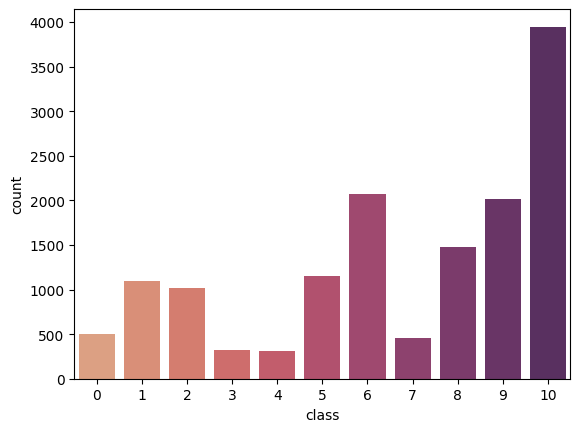

In [ ]:
sns.countplot(x='class', data=train_df_checkP, palette="flare")

In [ ]:
train_df_checkP

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
0,1,1,2,9,1,0.0,0.03810,1,0,0,1,5,3.415783,4,9
1,3,3,3,11,1,1.0,0.08760,0,0,0,1,4,3.199267,4,6
2,2,2,4,7,1,1.0,0.06190,0,1,1,0,5,2.683950,4,10
3,0,2,1,7,0,1.0,0.03120,4,0,1,0,5,4.968217,3,2
4,2,2,3,6,1,0.0,0.15555,0,0,1,0,2,4.235750,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,2,3,4,1,2,1.0,0.15000,0,0,1,0,4,3.253017,4,10
14392,1,2,4,8,1,1.0,0.05760,0,1,0,1,4,4.700717,4,8
14393,1,2,4,11,2,1.0,0.05240,0,0,1,0,5,2.942150,4,10
14394,1,2,4,1,2,1.0,0.09170,0,0,0,0,4,3.105117,4,10


In [ ]:
train_df_checkP.isnull().sum()

,0
popularity,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0


In [ ]:
test_df_checkP

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,2,3,3,2.0,1,0.0,0.09410,0,0,0,0,2,3.333333,4
1,0,2,3,2.0,1,1.0,0.03060,1,1,1,0,5,4.731817,4
2,3,3,1,2.0,0,1.0,0.02930,4,0,0,1,2,3.875550,4
3,2,2,4,7.0,2,1.0,0.03970,0,0,0,0,2,3.700883,4
4,1,3,3,1.0,1,0.0,0.15555,0,0,0,0,1,1.973983,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2,1,4,5.0,2,0.0,0.05780,0,0,0,1,5,4.466450,4
3596,1,2,3,5.0,2,0.0,0.15555,1,0,0,0,5,3.305000,4
3597,0,3,4,1.0,1,1.0,0.04890,0,1,0,1,4,5.653550,4
3598,1,2,2,5.0,0,1.0,0.04260,1,0,0,0,5,3.043117,3


In [ ]:
test_df_checkP.isnull().sum()

,0
popularity,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0


**The end of preprocessing**

Now we going to make the last checkpoint for our data.

In [ ]:
train_preprocessed = train_df_checkP.copy()
test_preprocessed = test_df_checkP.copy()
train = train_preprocessed.copy()
test = test_preprocessed.copy()

# Modelling

In [ ]:
train.drop(columns = ["key"], inplace = True)
test.drop(columns = ["key"], inplace = True)

In [ ]:
X = train.drop("class", axis=1)
y = train["class"]

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

## XGboost

In [ ]:
xgb = XGBClassifier(
    n_estimators = 1800,
    objective = "multi:softmax",
    booster = "gbtree",
    eta=0.01,
    eval_metric = "mlogloss",
    max_depth = 8,
    subsample = 0.7,
    colsample_bytree = 0.3)

xgb.fit(Xtrain, ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1800,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
Xgb_loss = xgb.score(Xtrain, ytrain)
y_predict = xgb.predict(Xtest)
xgb_acc = accuracy_score(ytest, y_predict)

## Catboost

In [ ]:
cb = CatBoostClassifier(
    n_estimators=1800,
    depth=8,
    loss_function="MultiClass",
    learning_rate=0.01,
    l2_leaf_reg=2,
    thread_count=-1,
    eval_metric="Accuracy",
    logging_level= "Silent")

cb.fit(Xtrain, ytrain)

In [ ]:
cb_loss  = cb.score(Xtrain, ytrain)
y_cb_pred = cb.predict(Xtest)
cb_acc = accuracy_score(ytest, y_cb_pred)

## Neural Networks

In [ ]:
y_train = to_categorical(ytrain, num_classes=11)
y_test = to_categorical(ytest, num_classes=11)

In [ ]:
model = Sequential()
model.add(Dense(15, input_shape=(Xtrain.shape[1],), activation="relu"))
model.add(Dense(20, activation="relu"))

model.add(Dense(25, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(11, activation="softmax"))


early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(Xtrain,
          y_train,
          epochs=100,
          validation_split=0.3,
          verbose=1,
          callbacks=[early_stopping])

Epoch 1/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2260 - loss: 2.1847 - val_accuracy: 0.3522 - val_loss: 1.7881
Epoch 2/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3504 - loss: 1.7046 - val_accuracy: 0.3980 - val_loss: 1.5618
Epoch 3/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4000 - loss: 1.5482 - val_accuracy: 0.3820 - val_loss: 1.5473
Epoch 4/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3936 - loss: 1.5187 - val_accuracy: 0.4130 - val_loss: 1.4834
Epoch 5/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4245 - loss: 1.4786 - val_accuracy: 0.4188 - val_loss: 1.4743
Epoch 6/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4289 - loss: 1.4686 - val_accuracy: 0.4293 - val_loss: 1.4640
Epoch 7/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4204 - loss: 1.4669 - val_accuracy: 0.4388 - val_loss: 1.4520
Epoch 8/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4337 - loss: 1.4410 - val_accu

In [ ]:
nn_loss = model.evaluate(Xtrain, y_train)
model_pred = model.predict(Xtest) # Can use the evaluata method as a second way
nn_acc = accuracy_score(ytest, np.argmax(model_pred, axis=1))

360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4908 - loss: 1.3271
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
results = pd.DataFrame(columns=["Model", "Accuracy", "Training Loss"])

results["Model"] = ["XGBoost", "CatBoost", "Neural Network"]
results["Accuracy"] = [xgb_acc, cb_acc, nn_acc]
results["Training Loss"] = [xgb.score(Xtrain, ytrain), cb.score(Xtrain, ytrain), nn_loss[0]]

In [ ]:
results

,Model,Accuracy,Training Loss
0,XGBoost,0.498435,0.668696
1,CatBoost,0.501913,0.669653
2,Neural Network,0.487304,1.334650
